# Stock price Prediction of TCS using LSTM Neural Networks:

In [20]:
## import essential libraries

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA



# Reading data using parse date
As it is timeseries data so we have to read the data by parsing date means making data column as index.

In [58]:
## read csv file
df_final = pd.read_csv("TCS.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [59]:
df_final.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-04-03,241.125,244.125000,240.25000,243.431244,132.405640,459912.0
2006-04-04,244.375,245.975006,241.90625,243.481247,132.432800,553648.0
2006-04-05,244.000,245.375000,239.87500,241.243744,131.215805,732216.0
2006-04-07,243.500,250.000000,235.00000,236.100006,128.418030,2982344.0
2006-04-10,235.625,239.750000,235.00000,236.975006,128.893967,1666248.0


In [60]:

df_final.shape

(4444, 6)

In [61]:
df_final.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4.413000e+03
mean,1411.437896,1425.654315,1396.070607,1410.645709,1296.661451,4.463599e+05
std,1124.707336,1133.897610,1114.383965,1124.101775,1141.365985,1.030609e+06
min,112.500000,116.224998,104.500000,111.287498,71.213020,9.598000e+03
25%,464.399994,472.225006,458.024994,464.899994,335.009216,9.506800e+04
50%,1190.000000,1200.750000,1178.224976,1190.375000,1050.273926,1.841940e+05
75%,2088.000000,2111.000000,2062.600098,2082.750000,2010.980469,4.944340e+05
max,4217.500000,4254.450195,4177.000000,4217.500000,4217.500000,3.557355e+07


In [62]:
df_final.isnull().values.any()

True

In [63]:
df_final.dropna(inplace=True)

<Axes: xlabel='Date'>

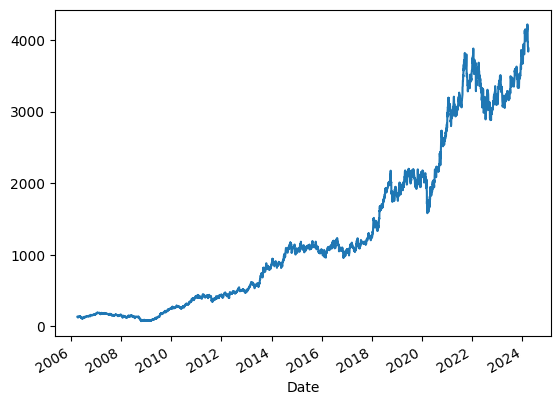

In [64]:
df_final['Adj Close'].plot()

# Correlation Analysis

In [65]:
X=df_final.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<Axes: title={'center': 'Correlation with Adj Close'}>

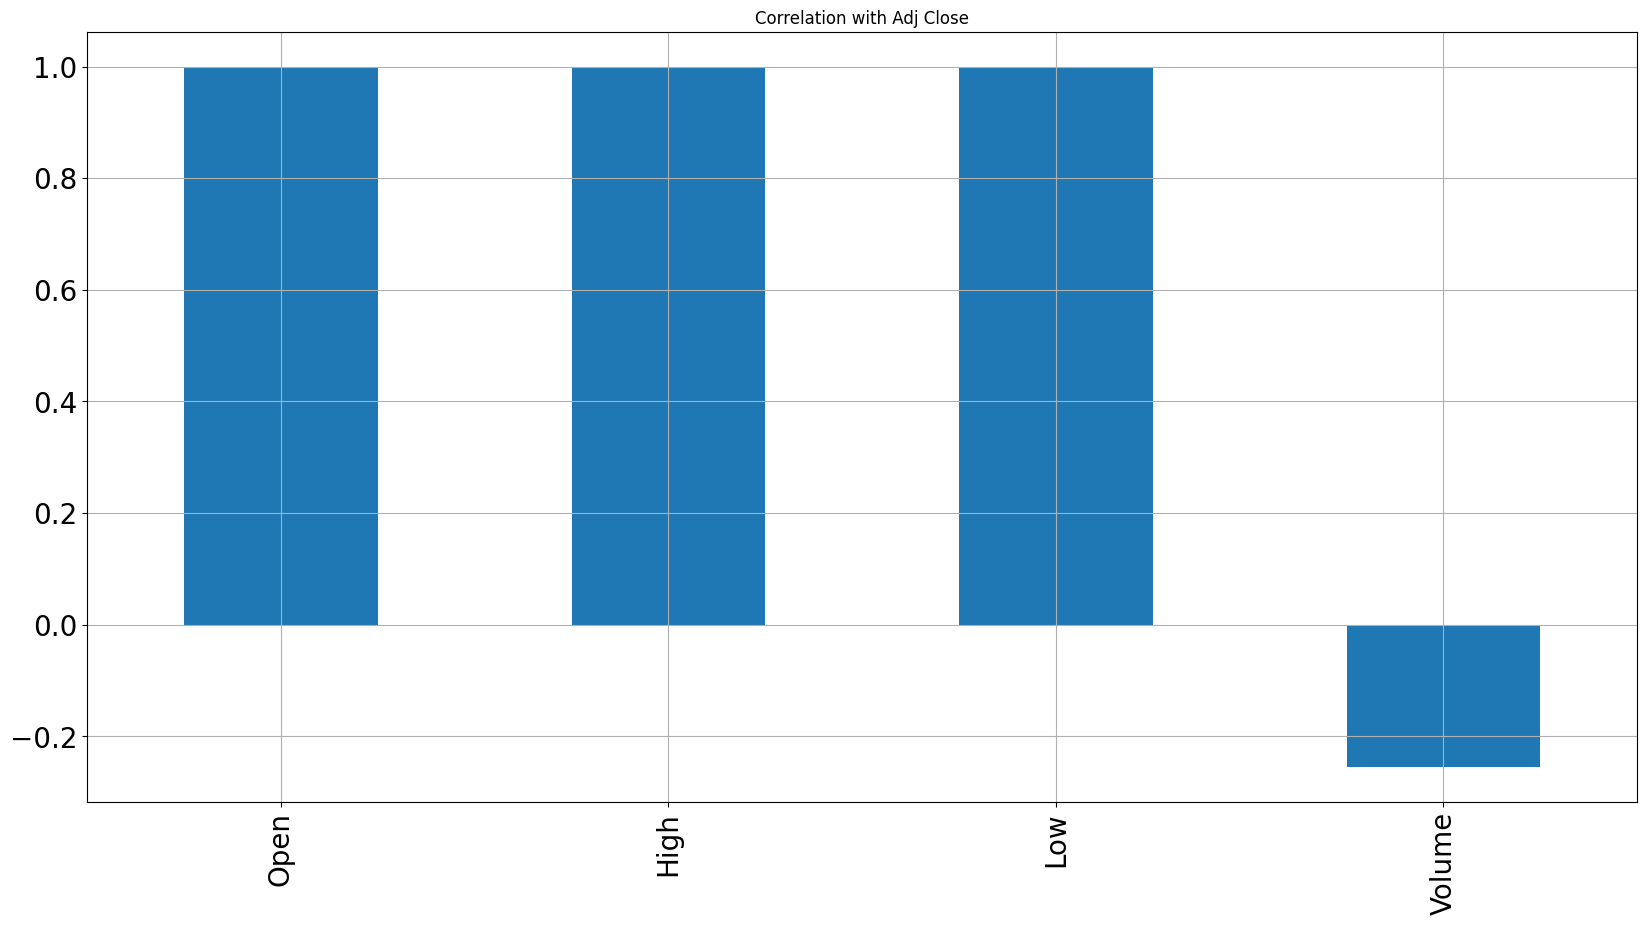

In [66]:
## correlation matrix

X.corrwith(df_final['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [67]:
test = df_final
# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])
display(test.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-04-03,241.125,244.125000,240.25000,243.431244,132.405640,459912.0
2006-04-04,244.375,245.975006,241.90625,243.481247,132.432800,553648.0
2006-04-05,244.000,245.375000,239.87500,241.243744,131.215805,732216.0
2006-04-07,243.500,250.000000,235.00000,236.100006,128.418030,2982344.0
2006-04-10,235.625,239.750000,235.00000,236.975006,128.893967,1666248.0


In [68]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume']

# Normalizing the data

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
2006-04-03,0.031334,0.030907,0.033333,0.012662
2006-04-04,0.032125,0.031354,0.033740,0.015298
2006-04-05,0.032034,0.031209,0.033241,0.020319
2006-04-07,0.031912,0.032327,0.032044,0.083589
2006-04-10,0.029994,0.029850,0.032044,0.046582


In [33]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

,Open,High,Low,Volume
Date,,,,
2006-04-03,0.031334,0.030907,0.033333,0.012662
2006-04-04,0.032125,0.031354,0.033740,0.015298
2006-04-05,0.032034,0.031209,0.033241,0.020319
2006-04-07,0.031912,0.032327,0.032044,0.083589
2006-04-10,0.029994,0.029850,0.032044,0.046582


Shape of features :  (4413, 4)
Shape of target :  (4413, 1)


,Open,High,Low,Volume
Date,,,,
2024-03-20,0.943605,0.942862,0.946839,0.003581
2024-03-21,0.943459,0.940554,0.943978,0.001556
2024-03-22,0.922412,0.923627,0.921179,0.007489
2024-03-26,0.922058,0.925463,0.925107,0.005462
2024-03-27,0.921912,0.913610,0.914438,0.001739


,Adj Close
Date,
2024-03-20,3974.050049
2024-03-21,3913.100098
2024-03-22,3877.100098
2024-03-26,3837.500000
2024-03-27,3883.550049



 -----After process------ 

Shape of features :  (4323, 4)
Shape of target :  (4323, 1)


,Adj Close
Date,
2023-11-07,3380.750000
2023-11-08,3348.250000
2023-11-09,3332.800049
2023-11-10,3331.699951
2023-11-13,3399.300049


# Train test Split using Timeseriessplit

In [70]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [71]:

X_train.shape

(4012, 4)

In [72]:
X_test.shape

(401, 4)

In [73]:
y_train.shape

(4012,)

In [74]:
y_test.shape

(401,)

In [75]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)

    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# Benchmark Model

**Decision_Tree_Regressor**

RMSE:  283.43805863878754
R2 score:  -0.7198385243711785


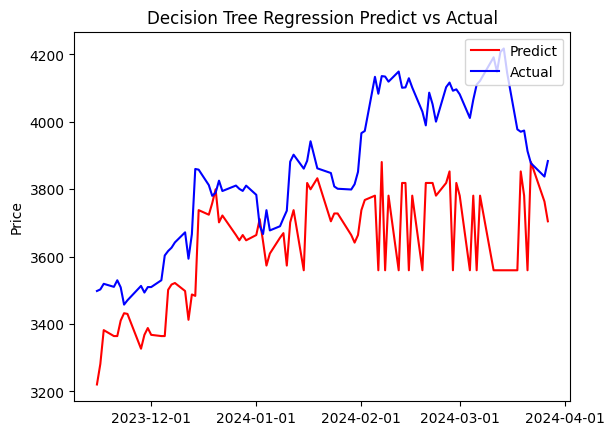

In [40]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train, y_train)

validate_result(benchmark_dt, 'Decision Tree Regression')

**XG_Boost_Regressor**

RMSE:  1712.360752384338
R2 score:  -61.77140851929769


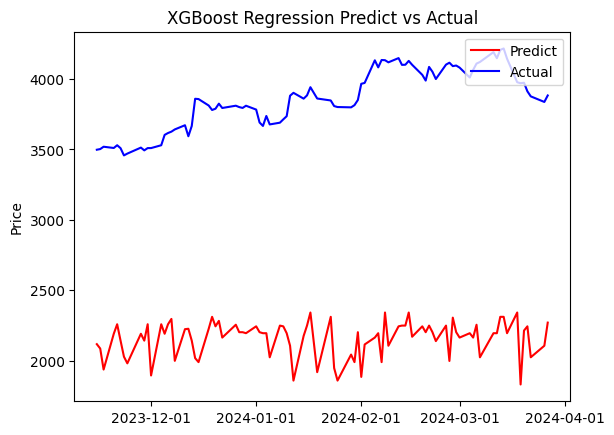

In [41]:
from xgboost import XGBRegressor


xg_reg = XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10, random_state=0)

xg_reg.fit(X_train, y_train)


validate_result(xg_reg, 'XGBoost Regression')

**Time_Series_Arima_model**

In [42]:
# Preprocess features (assuming 'Open', 'High', 'Low', 'Volume' are your features)
features = df_final[['Open', 'High', 'Low', 'Volume']]
target = df_final['Adj Close']

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
feature_scaled = scaler.fit_transform(features)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)

# Placeholder for model predictions and actual values
predictions = []
actuals = []

# Cross-validation for time series data
for train_index, test_index in tscv.split(feature_scaled):
    X_train, X_test = feature_scaled[train_index], feature_scaled[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Fit ARIMA model (you can replace this with any other model)
    model = ARIMA(y_train, order=(5,1,0))
    model_fit = model.fit()

    # Forecast
    forecast = model_fit.get_forecast(steps=len(test_index))
    predictions.append(forecast.predicted_mean)
    actuals.append(y_test)

# Flatten the list of predictions and actuals
predictions = [item for sublist in predictions for item in sublist]
actuals = [item for sublist in actuals for item in sublist]

# Calculate RMSE over all predictions
rmse = sqrt(mean_squared_error(actuals, predictions))
print('Overall Test RMSE: %.3f' % rmse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Overall Test RMSE: 360.757


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


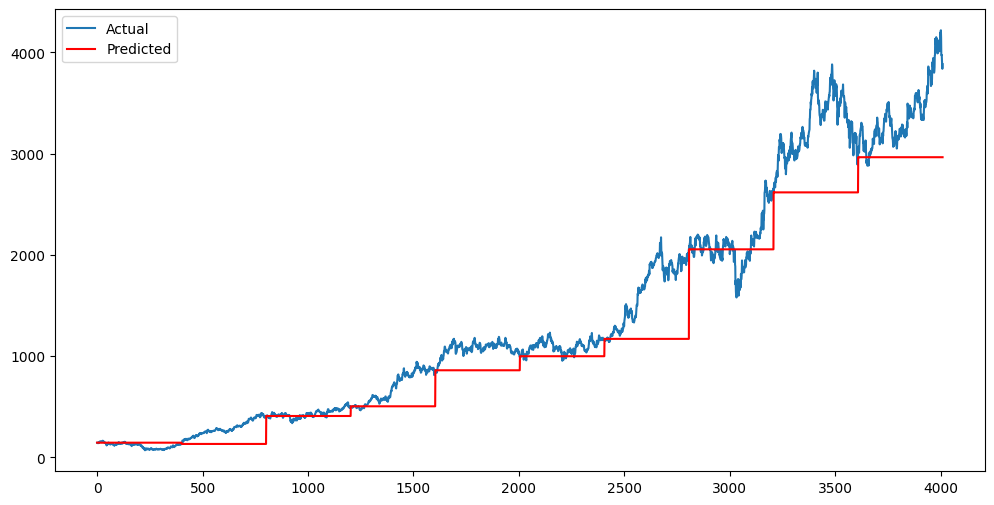

In [43]:
# Plot the predicted vs actual values
plt.figure(figsize=(12,6))
plt.plot(actuals, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()

# Process the data for LSTM

In [44]:
X_train =np.array(X_train)
X_test =np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Model building : LSTM

In [45]:

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
502/502 [==============================] - 6s 5ms/step - loss: 2094184.8750
Epoch 2/200
502/502 [==============================] - 4s 7ms/step - loss: 2048436.7500
Epoch 3/200
502/502 [==============================] - 4s 8ms/step - loss: 1992790.2500
Epoch 4/200
502/502 [==============================] - 2s 5ms/step - loss: 1925644.1250
Epoch 5/200
502/502 [==============================] - 2s 4ms/step - loss: 1849066.7500
Epoch 6/200
502/502 [==============================] - 2s 5ms/step - loss: 1765117.5000
Epoch 7/200
502/502 [==============================] - 3s 6ms/step - loss: 1675649.0000
Epoch 8/200
502/502 [==============================] - 3s 6ms/step - loss: 1582312.3750
Epoch 9/200
502/502 [==============================] - 2s 4ms/step - loss: 1486581.3750
Epoch 10/200
502/502 [==============================] - 1s 3ms/step - loss: 1389788.7500
Epoch 11/200
502/502 [==============================] - 1s 2ms/step - loss: 1293147.8750
Epoch 12/200
502/502 [========

# Evaluation of Model

In [78]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)


126/126 [==============================] - 0s 3ms/step
The R2 score on the Train set is:	0.998
The R2 score on the Test set is:	0.907


## Predictions made by LSTM

In [79]:
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)

401/401 [==============================] - 1s 2ms/step - loss: 8871.6533


In [80]:
print('LSTM: %f'%score_lstm)

LSTM: 8871.653320


In [81]:
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

13/13 [==============================] - 0s 2ms/step


# LSTM's Prediction Visual

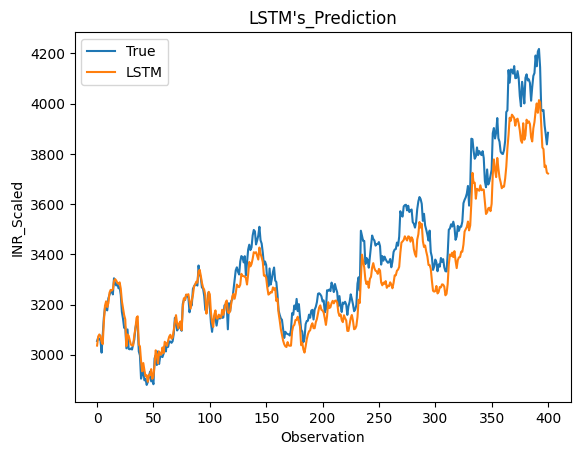

In [85]:
## Plot to visualize the accuracy
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()


# Converting Prediction data
In this step I have made the prediction of test data and will convert the dataframe to csv so that we can see the price difference between actual and predicted price.

In [86]:
col1 = pd.DataFrame(y_test, columns=['True'])

col2 = pd.DataFrame(y_pred_test_LSTM, columns=['LSTM_prediction'])

col3 = pd.DataFrame(history_model_lstm.history['loss'], columns=['Loss_LSTM'])
results = pd.concat([col1, col2, col3], axis=1)
results.to_excel('PredictionResults_LSTM_NonShift.xlsx')

# Conclusion

It is impossible to  get a model that can 99% predict the price without any error, there are too many factors can affect the
stock prices. So, we cannot hope there is a perfect model, but the general trend of predicted price is in line with the actual data, so the trader could have an indicator to reference, and makes trading decision by himself.


Further, we can improve the model's accuracy by increasing the epochs, trying out different activation functions or even change the model's structure. As exact